<a href="https://colab.research.google.com/github/jungyoojang/MachineLearning/blob/main/%EA%B3%BC%EC%A0%9C1_202136026%20%EC%9E%A5%EC%9C%A0%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리

데이터분석에 필요한 라이브러리를 불러온다

In [83]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

## 2. csv 파일 불러오기

train, test 데이터를 불러온다

In [85]:
# pandas를 이용하여 데이터를 읽어온다
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/test.csv")

## 3. 데이터 정보 파악

<클래스 설명>

- survived : 생존=1, 죽음=0

- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3

- sibsp : 함께 탑승한 형제 또는 배우자 수

- parch : 함께 탑승한 부모 또는 자녀 수

- ticket : 티켓 번호

- cabin : 선실 번호

- embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [86]:
# 상위 5개의 데이터를 불러온다
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
# 데이터의 columns, rows를 불러온다
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)

train data shape:  (891, 12)
test data shape:  (418, 11)


In [89]:
# 데이터의 누락값과 데이터타입을 파악한다
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


age, cabin, embarked에 해당되는 데이터 중 NaN이 있는 것을 확인

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. 데이터 시각화

생존자 비율 분포 (0 = 생존, 1 = 사망)

전체 탑승자 중 61.8%이 생존함

<Axes: ylabel='Survived'>

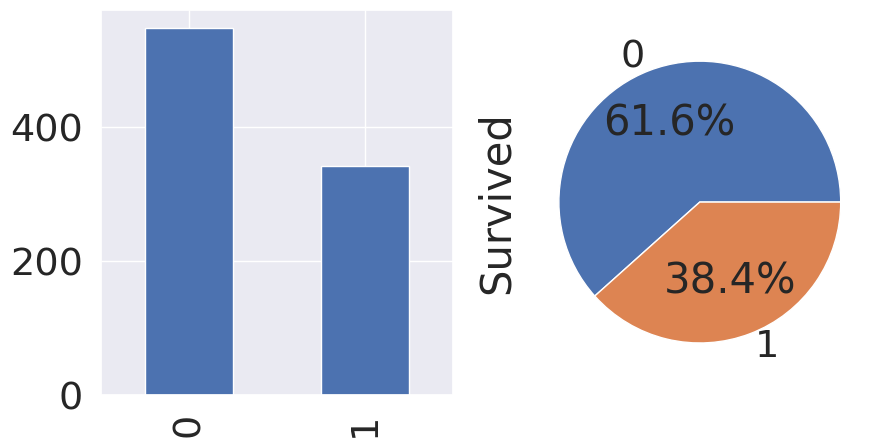

In [91]:
plt.figure(figsize=(10,5))
plt.xlabel("Survived")
plt.ylabel("counts")
plt.subplot(1,2,1)
train['Survived'].value_counts().plot(kind='bar') # 막대(bar)그래프

plt.subplot(1,2,2)
train["Survived"].value_counts().plot(kind = "pie", autopct='%1.1f%%') # 파이(pie)그래프


성별에 따른 생존자, 사망자 분포

<Axes: xlabel='Sex', ylabel='count'>

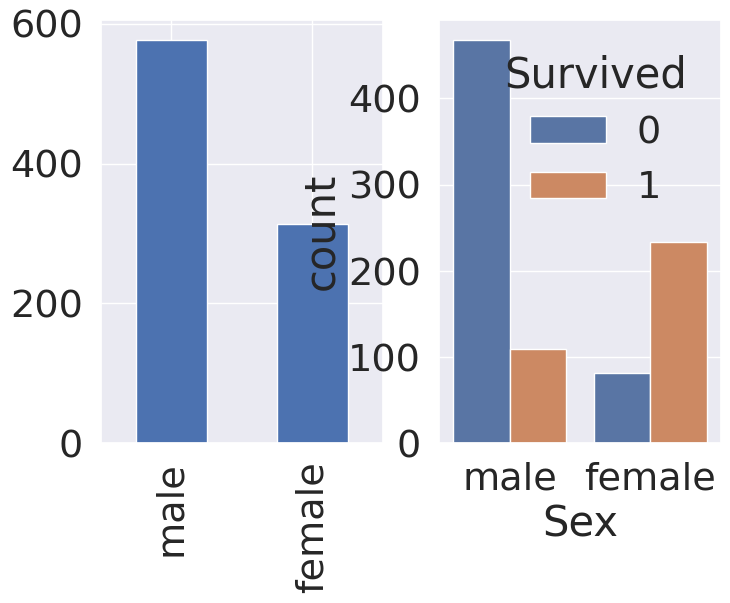

In [92]:
plt.subplot(1,2,1)
train["Sex"].value_counts().plot(kind = "bar")

plt.subplot(1,2,2)
sns.countplot(data=train, x="Sex", hue="Survived")

함께 동승한 형제 또는 배우자 수 분포

Text(0.5, 0, 'Sibsp')

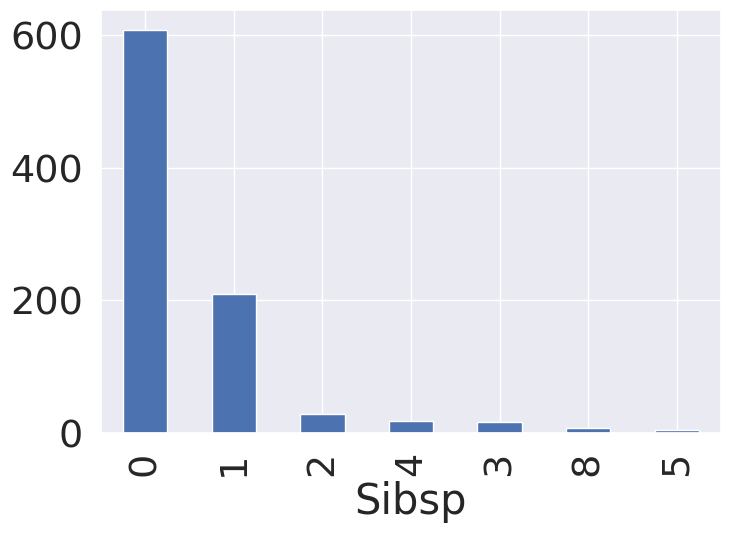

In [93]:
train["SibSp"].value_counts().plot(kind = "bar")
plt.xlabel("Sibsp")

탑승한 승강장에 따른 생존자, 사망자 분포

<Axes: xlabel='Embarked', ylabel='count'>

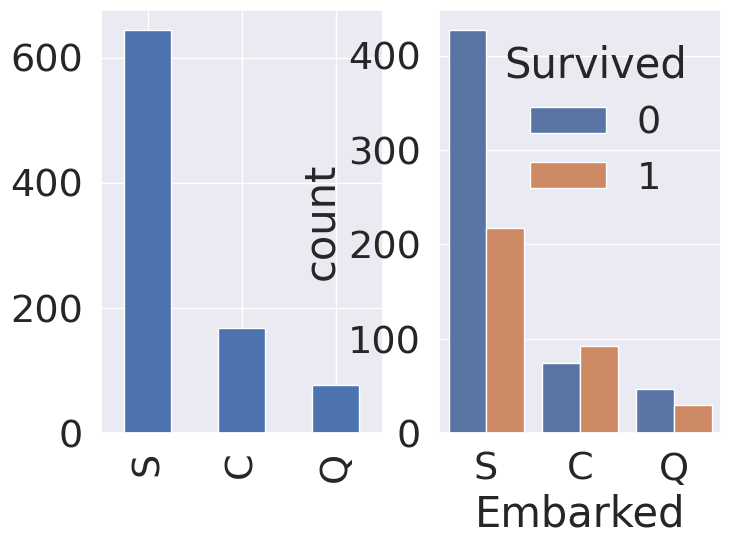

In [94]:
plt.subplot(1,2,1)
train["Embarked"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
sns.countplot(data=train, x="Embarked", hue="Survived")

함께 동승한 부모 또는 자녀 수 분포

<Axes: >

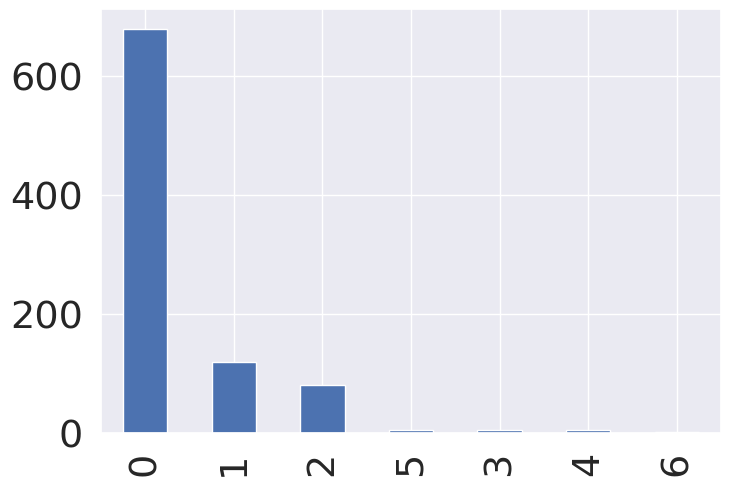

In [95]:
train["Parch"].value_counts().plot(kind = "bar")

## 5. 데이터 정제

In [96]:
# 결측치 분포 확인

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 5-1 Pclass

Pclass에 따른 생존률 확인

In [98]:
# pclass

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [99]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


등급이 높은 Pclass에 탑승할수록 생존확률이 높게 나타난다

Text(0, 0.5, 'Count')

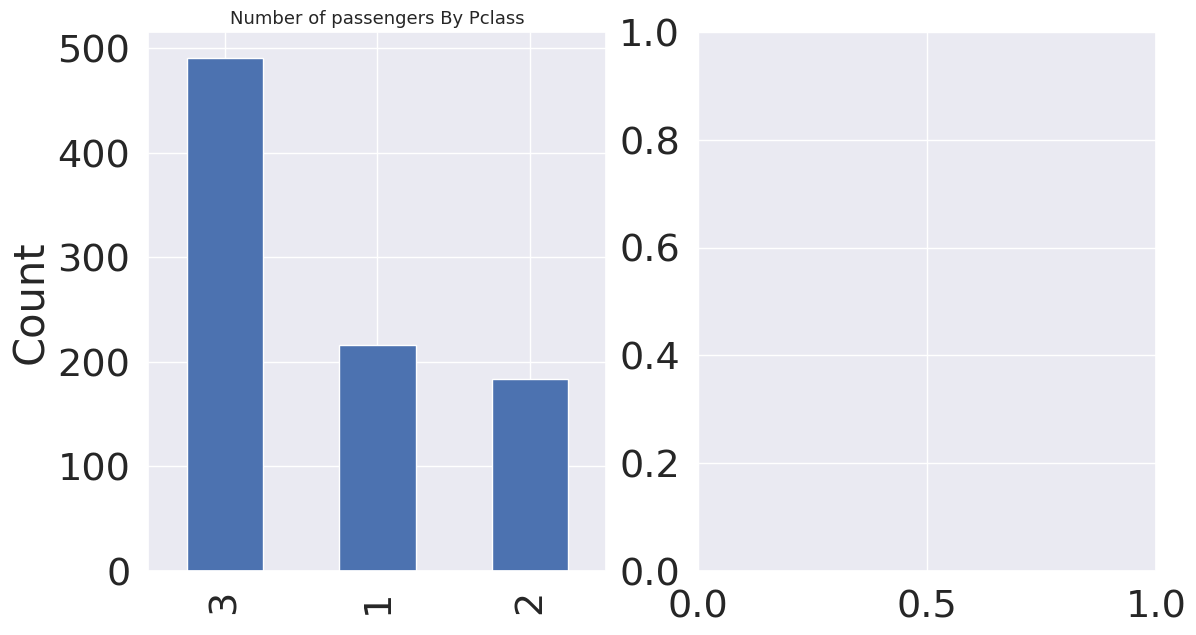

In [100]:
# 데이터 시각화
f, ax = plt.subplots(1, 2, figsize= (13,7))

train["Pclass"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Pclass", fontsize = 13)
ax[0].set_ylabel("Count")

Pclass가 3개로 나뉘기 때문에 one-hot encoding을 해준다

In [101]:
Pclass_train = pd.get_dummies(train["Pclass"])
Pclass_test = pd.get_dummies(train["Pclass"])

Pclass_train.columns = ["pclass_1", "pclass_2", "pclass_3"]
Pclass_test.columns = ["pclass_1", "pclass_2", "pclass_3"]

train.drop(["Pclass"], axis = 1, inplace = True)
test.drop(["Pclass"], axis = 1, inplace = True)

train = train.join(Pclass_train)
test = test.join(Pclass_test)

잘 나뉘어졌는지 확인한다

In [102]:
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


## 5-2 Sex

여성의 생존률이 더 높게 나타난다.

Text(0, 0.5, 'Count')

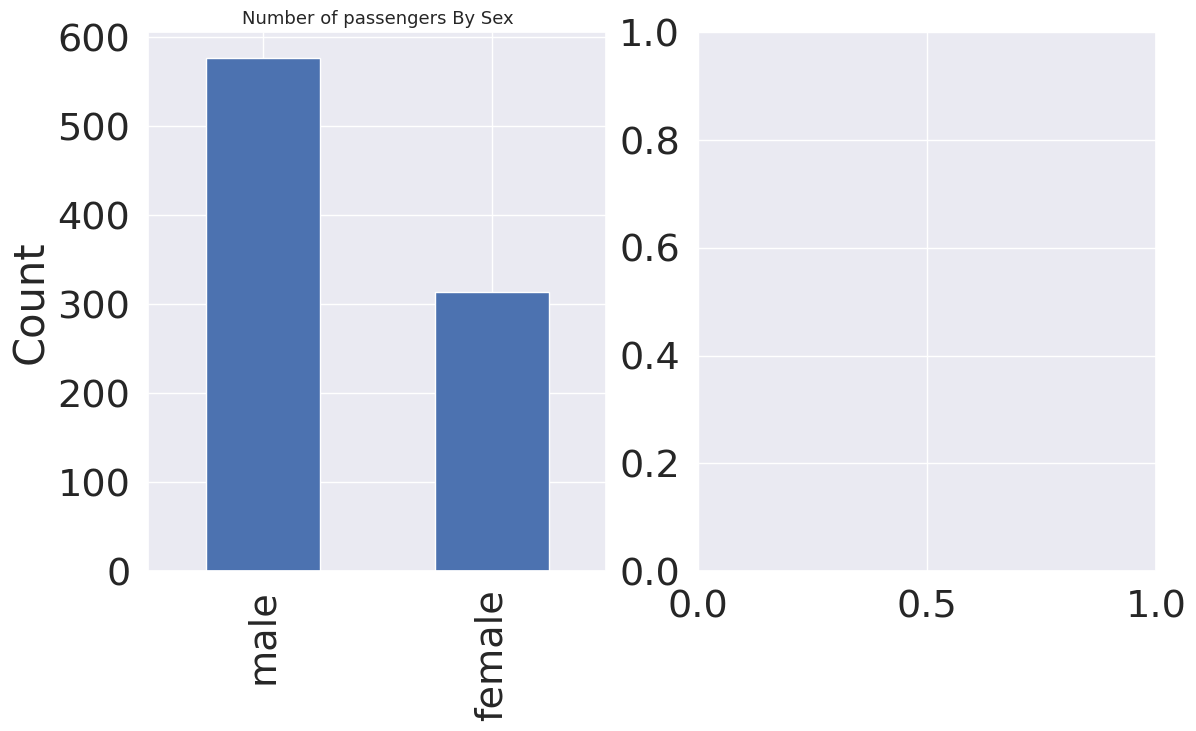

In [103]:
# 데이터 시각화
f, ax = plt.subplots(1, 2, figsize= (13,7))

train["Sex"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Sex", fontsize = 13)
ax[0].set_ylabel("Count")

성별에 따른 생존 분포를 나타내기 위해 one-hot encoding을 해준다.

In [104]:
sex_train = pd.get_dummies(train["Sex"])
sex_test = pd.get_dummies(train["Sex"])

sex_train.columns = ["Female", "Male"]
sex_test.columns = ["Female", "Male"]

train.drop(["Sex"], axis = 1, inplace = True)
test.drop(["Sex"], axis = 1, inplace = True)

train = train.join(sex_train)
test = test.join(sex_test)

잘 나뉘어졌는지 확인한다.

In [105]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,Female,Male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


### 5-3 Age

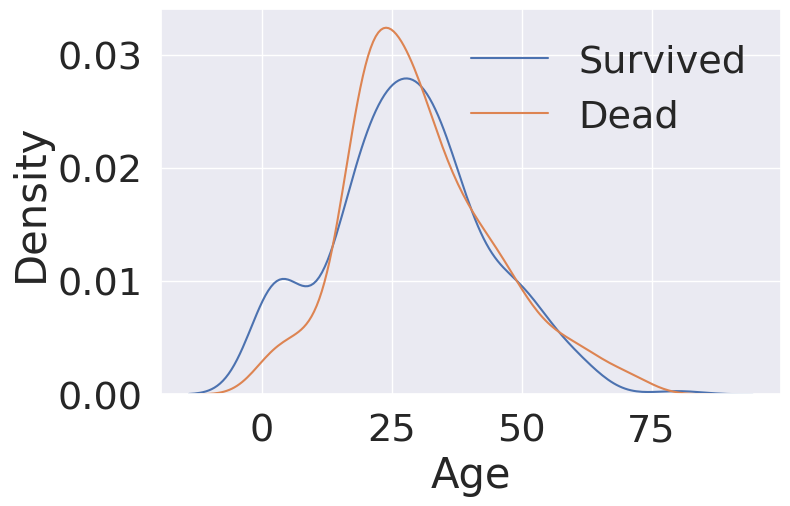

In [106]:
# 데이터 시각화
fix, ax = plt.subplots(1, 1, figsize = (8,5))

sns.kdeplot(train[train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax = ax)

plt.legend(["Survived", "Dead"])
plt.show()

나이 범위에 따른 생존률을 확인한다.

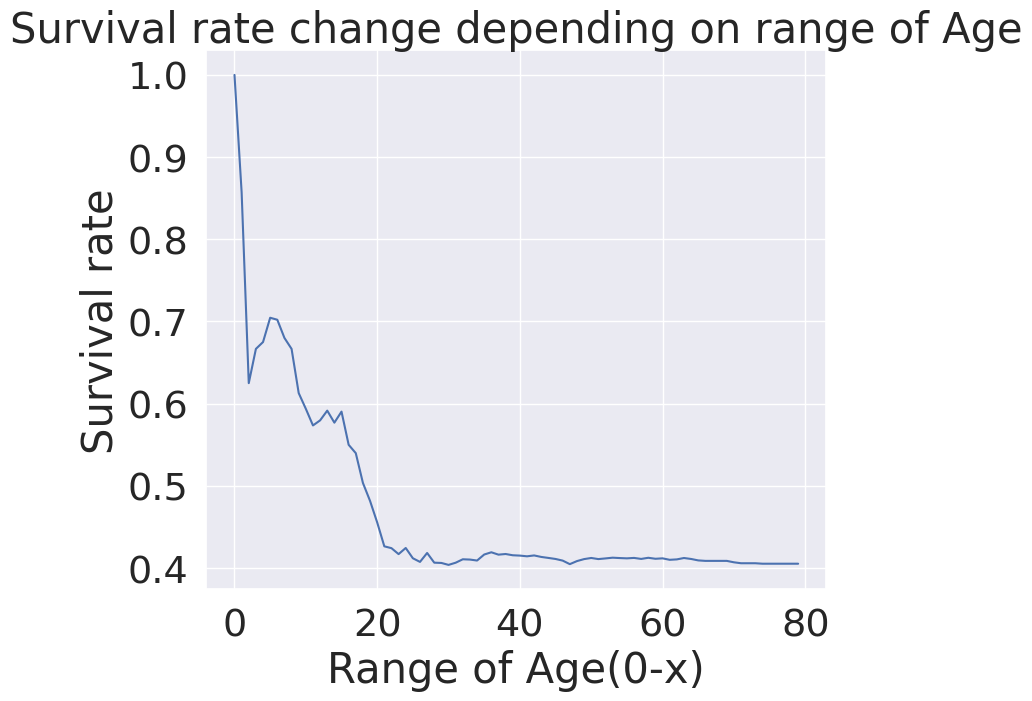

In [107]:
survival_rate = []

for i in range(int(train["Age"].min()), int(train["Age"].max())):
    survival_rate.append( train[ train["Age"] < i + 1]["Survived"].sum() / train[ train["Age"] < i + 1]["Survived"].count() )

plt.figure(figsize = (8, 7))
plt.plot(survival_rate)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0-x)")
plt.show()

age 데이터에 NaN값이 있기 때문에 처리를 해줘야한다.

잘 모르는 데이터에 대해서는 평균값으로 채우거나 아예 버리는 방법이 있는데

이 경우에는 나이의 평균값으로 채워주었다.

In [108]:
# 나이의 평균값으로 난수 채우기
train["Age"].fillna(train["Age"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)

### 5-4 Family

SibSp(형제, 자매)와 Parch(부모님)은 Family라는 하나의 카테고리로 묶은 후 처리한다.

In [109]:
train["Family"] = train["SibSp"] + train["Parch"] + 1 # 1은 본인
test["Family"] = test["SibSp"] + test["Parch"] + 1

In [110]:
train[["Name", "Family"]].head()

,Name,Family
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


### 5-5 Fare

탑승료에 따른 생존률을 확인한다.

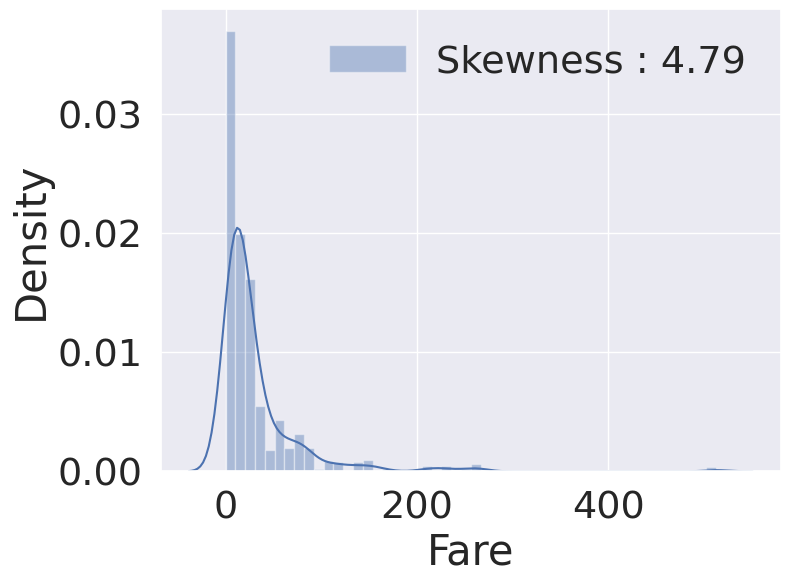

In [111]:
f, ax = plt.subplots(1, 1, figsize = (8,6))

g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")



그래프를 보면 확률분포가 매우 비대칭적이므로 모델이 잘못 학습될 수도 있다.

그러므로 log 함수를 취해준다.

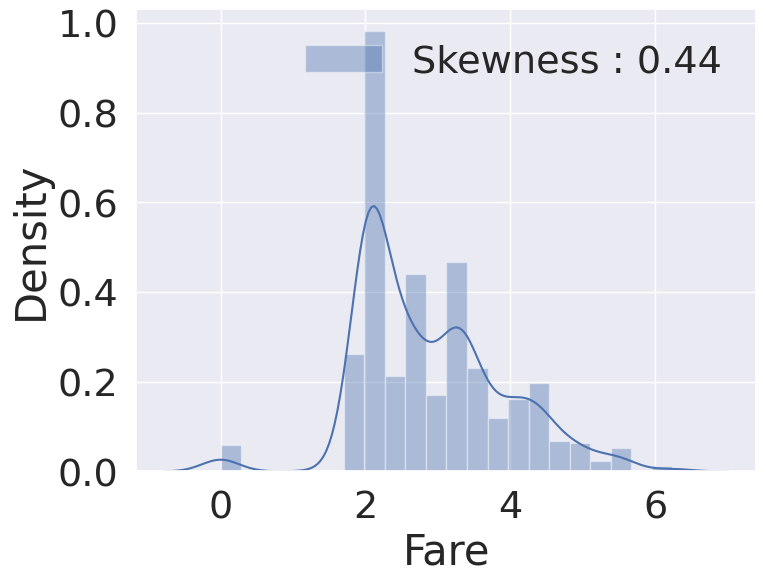

In [112]:
train["Fare"] = train["Fare"].map(lambda i : np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 1, figsize = (8,6))
g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

탑승료에는 test 데이터 세트에 하나의 데이터가 비어있기 때문에 빈 부분에 대해서는 평균값을 넣어준다.

In [113]:
test["Fare"].fillna(test["Fare"].mean(), inplace = True)

### 5-6 Cabin

Cabin은 null의 비율이 매우 높기 때문에 이를 통해 생존률을 예측하기 어렵다.

그러므로 Cabin 데이터는 제거한다.

In [114]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

### 5-7 Embarked

탑승구에 따른 생존률을 확인한다.

<Axes: xlabel='Embarked'>

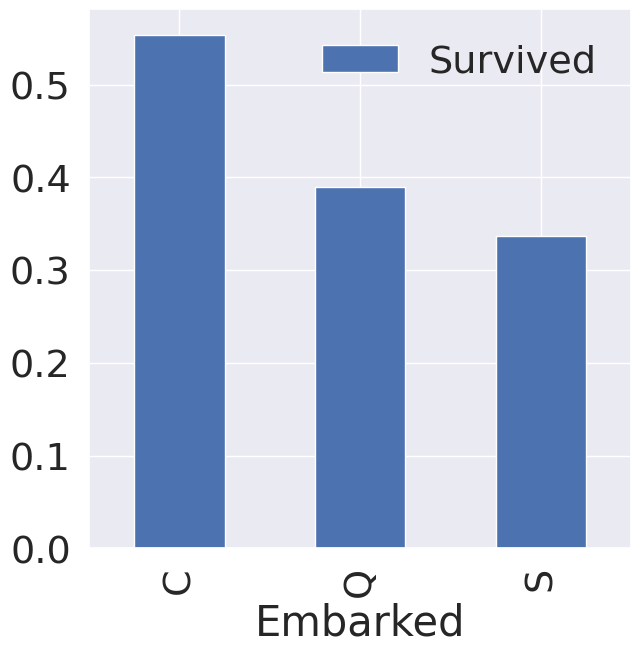

In [115]:
f, ax = plt.subplots(1, 1, figsize = (7,7))

train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax)

Embarked에는 2개의 null value가 있는데, S 탑승구에 가장 많은 승객이 있으므로 null value의 Embarked는 S로 채우도록 한다.

In [116]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

수월한 학습을 위해 one-hot-encoding을 진행한다.

In [117]:
embarked_train = pd.get_dummies(train["Embarked"])
embarked_test = pd.get_dummies(train["Embarked"])

embarked_train.columns = ["embarked_s", "embarked_c", "embarked_q"]
embarked_test.columns = ["embarked_s", "embarked_c", "embarked_q"]

train.drop(["Embarked"], axis = 1, inplace = True)
test.drop(["Embarked"], axis = 1, inplace = True)

train = train.join(embarked_train)
test = test.join(embarked_test)

In [118]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,pclass_1,pclass_2,pclass_3,Female,Male,Family,embarked_s,embarked_c,embarked_q
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.981001,0,0,1,0,1,2,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.266662,1,0,0,1,0,2,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.070022,0,0,1,1,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.972177,1,0,0,1,0,2,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.085672,0,0,1,0,1,1,0,0,1


### 5-8 필요 데이터 남기기

필요한 데이터만을 남기고 생존률 예측에 상관없는 데이터를 삭제한다.

In [119]:
train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)
test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)

In [120]:
train.head()

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3,Female,Family,embarked_s,embarked_c,embarked_q
0,0,22.0,1.981001,0,0,1,0,2,0,0,1
1,1,38.0,4.266662,1,0,0,1,2,1,0,0
2,1,26.0,2.070022,0,0,1,1,1,0,0,1
3,1,35.0,3.972177,1,0,0,1,2,0,0,1
4,0,35.0,2.085672,0,0,1,0,1,0,0,1


## 6. 데이터 나누기

train data에서 target에 해당되는 생존률을 train_target 변수에 미리 저장한다.

In [121]:
train_target = train["Survived"].values
train_data = train.drop("Survived", axis = 1).values

 dataframe 형식으로 되어있는 test를 list로 변환한다.

In [122]:
test_value = test.values
print(test_value)

[[34.5         2.05786033  0.         ...  0.          0.
   1.        ]
 [47.          1.94591015  1.         ...  1.          0.
   0.        ]
 [62.          2.27083639  0.         ...  0.          0.
   1.        ]
 ...
 [38.5         1.98100147  0.         ...  0.          0.
   1.        ]
 [30.27259036  2.08567209  0.         ...  0.          0.
   1.        ]
 [30.27259036  3.10719762  0.         ...  0.          0.
   1.        ]]


train_test_split함수를 사용하여 train dataset과 test dataset을 나눠준다.

이때 test의 비율은 20%로 설정한다.

In [123]:
train_input, test_input, train_target, test_target = \
        train_test_split(train_data, train_target, test_size = 0.2, random_state = 21)

## 7. 모델 생성과 예측

다항 특성 만들기 (특성 공학)

In [124]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x0^2',
       'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7',
       'x0 x8', 'x0 x9', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5',
       'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x2^2', 'x2 x3', 'x2 x4',
       'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x3^2', 'x3 x4',
       'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x4^2', 'x4 x5',
       'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x5^2', 'x5 x6', 'x5 x7',
       'x5 x8', 'x5 x9', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x7^2',
       'x7 x8', 'x7 x9', 'x8^2', 'x8 x9', 'x9^2'], dtype=object)

데이터 전처리를 진행한다.

In [125]:
from sklearn.preprocessing import StandardScaler # 변환기

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

**1. SGD 예측**

먼저 기본값이 설정된 모델을 훈련한다. (max_iter를 10으로 지정한다.)

In [126]:
from sklearn.linear_model import SGDClassifier

# 모델 훈련
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=21)
sc.fit(train_scaled, train_target)

# 정확도 점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8160112359550562
0.8156424581005587


훈련 점수와 테스트 점수 둘 다 낮기 때문에 과소적합이다.

에포크가 적어 생긴 과소적합을 해결하기 위해 매개변수 max_iter로 수행할 에포크 횟수를 지정해 최적화를 진행한다.

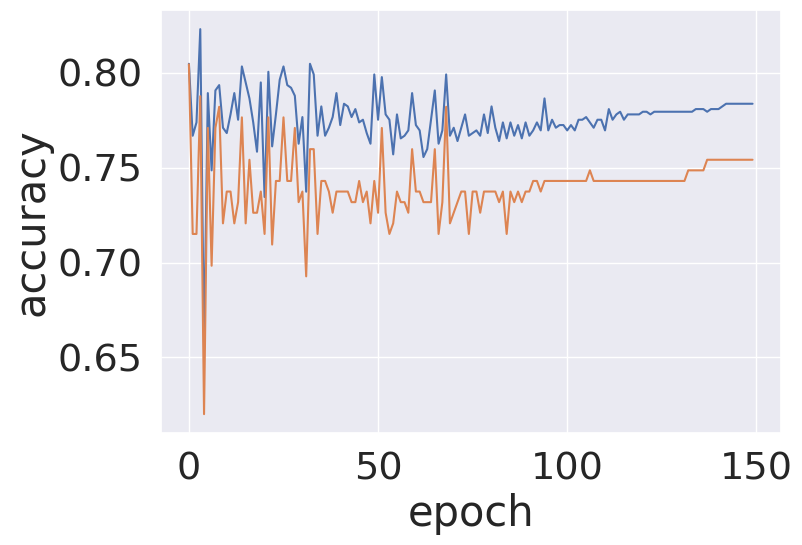

In [127]:
sc = SGDClassifier(loss='log_loss', random_state=21)

# 훈련 점수와 테스트 점수를 담을 두 개의 리스트를 준비한다.
train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 150): # 150번의 에포크동안 훈련을 반복한다.
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

# 추이 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

반복 횟수 60번째 이후에 훈련 세트와 테스트 세트 점수가 벌어지기 때문에 최적화 횟수를 60으로 지정한다.

In [128]:
sc = SGDClassifier(loss='log_loss', max_iter=60, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

# 최적화된 점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8300561797752809
0.7932960893854749


과소적합이 해결되었다.

**2. 결정트리**

기본값이 설정된 모델을 훈련한다.

In [129]:
from sklearn.tree import DecisionTreeClassifier

# 모델 훈련
dt = DecisionTreeClassifier(random_state=21)
dt.fit(train_scaled, train_target)

# 정확도 점수 출력
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9859550561797753
0.7821229050279329


훈련세트의 값이 테스트세트의 값보다 훨씬 큰 것으로 보아 훈련세트에만 과대적합된 것으로 보인다.

그러므로 과대적합을 보장해주는 max_depth 매개변수를 사용하여 최적화을 진행한다.

max_depth의 최적값을 찾기 위해 랜덤 서치 방법을 사용하도록 한다.

너무 많은 매개변수 조합이 있기 때문에 랜덤 서치 방법을 사용하였다.

In [136]:
from scipy.stats import uniform, randint

# 매개변수 범위를 랜덤으로 지정
param = { 'max_depth': randint(0, 20) }

# 랜덤 서치 객체 생성 및 훈련
from sklearn.model_selection import RandomizedSearchCV

 # 샘플링 횟수= 100
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=21), param,
                        n_iter=100, n_jobs=-1, random_state=21)

# 모델 훈련
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=21),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a74318fe890>},
                   random_state=21)

최적의 매개변수를 출력한다.

In [133]:
print(gs.best_params_)

{'max_depth': 3}


랜덤 서치로 찾아낸 최적값 3으로 모델을 다시 훈련시킨다.

In [135]:
dt = DecisionTreeClassifier(max_depth=3, random_state=21)
dt.fit(train_scaled, train_target)

# 최적화된 점수 출력
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8314606741573034
0.8044692737430168


테스트 세트의 점수는 낮아졌지만, 과대적합은 해결되었다.

**3. 랜덤 포레스트**

기본값으로 설정된 모델을 훈련시킨다.

In [141]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=21)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수 출력
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9880609256004685 0.7851669457303261


특성중요도를 출력한다.

In [142]:
rf.fit(train_input, train_target) # 모델 훈련
print(rf.feature_importances_)

[0.27040105 0.27063209 0.0246564  0.01374983 0.05332565 0.25343551
 0.07324733 0.01371219 0.00976855 0.0170714 ]


최종적으로 테스트 점수를 확인한다.

In [149]:
rf.score(test_input, test_target)

0.8435754189944135

**4. 히스토그램기반 그래이디언트 부스팅**

기본값으로 설정된 모델을 훈련시킨다.

In [143]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=21)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련세트 점수 / 검증세트 점수
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9480331760860852 0.7893627499261302


permutation_importance()을 이용하여 모델의 성능 변화를 관찰하여 어떤 특성이 중요한지 계산하도록 한다.

In [144]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target) # 모델 훈련
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=21, n_jobs=-1)
print(result.importances_mean)

[0.12022472 0.12303371 0.00519663 0.00238764 0.04873596 0.2127809
 0.04522472 0.01011236 0.00393258 0.00744382]


테스트 세트에 대한 특성 중요도를 계산한다.

In [147]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[ 0.04357542  0.03463687 -0.00391061 -0.0027933   0.04636872  0.16648045
  0.02402235 -0.00949721 -0.00167598  0.00670391]


최종적으로 테스트세트 점수를 확인한다.

In [148]:
hgb.score(test_input, test_target)

0.8156424581005587